In [1]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston

In [2]:
import pandas as pd
import numpy as np
dp=pd.read_csv('C:/Users/Pratham Bisht/Downloads/housing.csv',header=None)
df=dp.values
data=df[:,:-1]
target=df[:,-1]

'''data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
'''

'data_url = "http://lib.stat.cmu.edu/datasets/boston"\nraw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)\ndata = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])\ntarget = raw_df.values[1::2, 2]\n'

In [3]:
dp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape,target.shape

((506, 13), (506,))

axis=0 means row is the changing parameter and column is constant parameter

axis=1 means column is the changing parameter and row is constant parameter

In [5]:
#normalization
u=np.mean(data,axis=0) 
std=np.std(data,axis=0)
data=(data-u)/std

In hypothesis function x0=1 but here x0=first col so to correct this we will add ones col at the start in train and test dataset

In [6]:
ones=np.ones((data.shape[0],1))
data=np.hstack((ones,data))

In [7]:
split = 0.8

train_X = data[:int(split * data.shape[0]), :]
test_X = data[int(split * data.shape[0]):, :]
train_Y = target[:int(split * target.shape[0])]
test_Y = target[int(split * target.shape[0]):]

In [8]:
print(train_X.shape,test_X.shape ,train_Y.shape,test_Y.shape)

(404, 14) (102, 14) (404,) (102,)


In [9]:
train_X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        ,  1.2361952 , -0.48772236, ...,  0.80657583,
         0.44105193,  1.07470353],
       [ 1.        ,  0.69616637, -0.48772236, ...,  0.80657583,
         0.21310292,  1.07330179],
       [ 1.        ,  2.46573659, -0.48772236, ...,  0.80657583,
         0.44105193,  0.99760795]])

In [10]:
#for prediction of value
def hypothesis(x,weights):
    y_pred=0
    for i in range(x.shape[0]):   
        y_pred+=weights[i] * x[i]
    return y_pred 

In [11]:
def loss_func(x,weights,y): #here x's dim is (m,n)
    loss=0
    
    for i in range(x.shape[0]):
    # here x[i]'s dim is(n,1) which is a col matrix ie why we using x.shape[0] in hypothesis func as we are getting col as input
        y_pred=hypothesis(x[i],weights) 
        loss +=(y_pred-y[i])**2
     
    return loss/x.shape[0]

In [12]:
def gradient(x,y,weights):
    grad=np.zeros((x.shape[1],))
    
    for j in range(x.shape[1]):    
        for i in range(x.shape[0]):
            y_pred=hypothesis(x[i],weights)
           
            grad[j] +=(y_pred-y[i])*x[i][j]
        
    return grad/x.shape[0]

In [13]:
def gradient_descent(x,y):    # Wj= Wj-alpha(dJ/dWj)
    weights = np.zeros((x.shape[1],))
    lr_rate= 0.03
    loss_epoch=[]
    
    epochs=1000
    
    for i in range(epochs):
        grad= gradient(x,y,weights)

        loss_epoch.append(loss_func(x,weights,y))
        
        for j in range(x.shape[1]):
            weights[j] = weights[j] - lr_rate * grad[j]
        
        
    return weights , loss_epoch

In [14]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

20.99653196334839


In [15]:
weights

array([23.03829851, -1.62971667,  0.98212177,  0.19169693,  0.51555901,
       -1.6165734 ,  3.34953527,  0.05169315, -2.74332546,  3.26287864,
       -1.94644908, -1.71584799,  0.03474858, -3.81536968])

In [16]:
loss_epoch

[670.0209405940592,
 590.581587772515,
 527.8757701775032,
 477.36893650338806,
 435.85493377004696,
 401.05839892240766,
 371.35687139894435,
 345.58651710186444,
 322.9062507681232,
 302.7026516308741,
 284.5233790698483,
 268.0305036799736,
 252.9677586778422,
 239.13752461878443,
 226.3846228595929,
 214.58487473594312,
 203.63699899316703,
 193.45684987990776,
 183.97329852642105,
 175.1252699094152,
 166.85959417107432,
 159.12943338450887,
 151.89311635828415,
 145.1132640470167,
 138.75612307545745,
 132.79104932315448,
 127.19010062098795,
 121.927709589932,
 116.98041604983247,
 112.32664431974878,
 107.94651487438483,
 103.8216827392,
 99.93519706737844,
 96.27137780162344,
 92.81570636219239,
 89.5547280451149,
 86.47596434890062,
 83.56783383562599,
 80.81958041610538,
 78.2212081590314,
 75.76342188165764,
 73.43757289967027,
 71.23560940680571,
 69.15003102791283,
 67.17384714776622,
 65.30053866571596,
 63.52402286588397,
 61.83862112597924,
 60.23902921630313,
 58.7202

In [17]:
import matplotlib.pyplot as plt

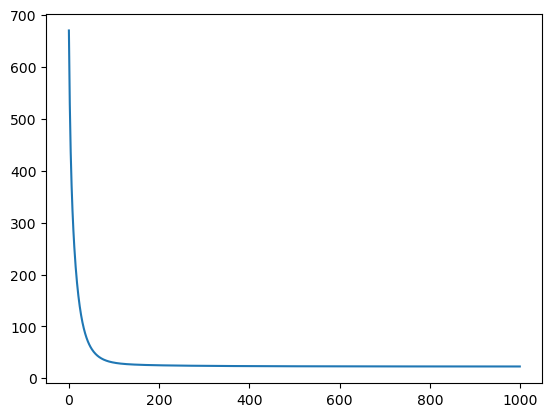

In [18]:
plt.plot(loss_epoch)
plt.show()

# OPTIMIZATION 

In [19]:
def hypothesis(x, weights):
    return np.dot(x, weights)

In [20]:
def loss_func(x, weights, y):
    loss = 0
    y_pred = hypothesis(x, weights)
    loss = np.sum((y_pred - y)**2)
    return loss/x.shape[0]

In [21]:
def gradient(x, y, weights):
    y_pred = hypothesis(x, weights)
    grad = np.dot(x.T, (y_pred - y))
        
    return grad/x.shape[0]

In [22]:
def gradient_descent(x, y):
    weights = np.zeros((x.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(x, y, weights)
        
        loss_epoch.append(loss_func(x, weights, y))
        
        weights = weights - lr_rate * grad
        
    return weights, loss_epoch

In [23]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

0.031943559646606445


In [24]:
weights

array([23.03829851, -1.62971667,  0.98212177,  0.19169693,  0.51555901,
       -1.6165734 ,  3.34953527,  0.05169315, -2.74332546,  3.26287864,
       -1.94644908, -1.71584799,  0.03474858, -3.81536968])

In [25]:
loss_epoch

[670.0209405940593,
 590.5815877725151,
 527.8757701775033,
 477.3689365033884,
 435.8549337700471,
 401.05839892240783,
 371.3568713989441,
 345.5865171018644,
 322.906250768123,
 302.702651630874,
 284.5233790698484,
 268.03050367997366,
 252.96775867784228,
 239.13752461878443,
 226.3846228595929,
 214.584874735943,
 203.63699899316717,
 193.4568498799078,
 183.97329852642113,
 175.1252699094153,
 166.8595941710745,
 159.12943338450887,
 151.89311635828417,
 145.11326404701668,
 138.75612307545748,
 132.79104932315454,
 127.190100620988,
 121.92770958993209,
 116.98041604983247,
 112.32664431974891,
 107.94651487438487,
 103.82168273920004,
 99.93519706737847,
 96.27137780162349,
 92.81570636219239,
 89.55472804511493,
 86.47596434890067,
 83.56783383562598,
 80.8195804161054,
 78.2212081590314,
 75.76342188165764,
 73.43757289967031,
 71.23560940680572,
 69.15003102791287,
 67.17384714776624,
 65.30053866571602,
 63.52402286588398,
 61.83862112597923,
 60.23902921630321,
 58.720289

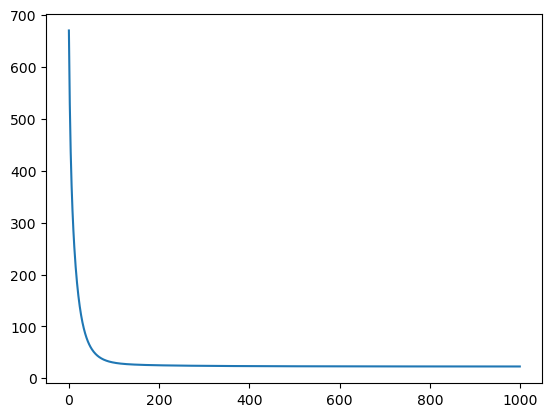

In [26]:
plt.plot(loss_epoch)
plt.show()

In [27]:
from sklearn import metrics

In [28]:
y_pred=hypothesis(test_X,weights)
print(y_pred.shape)

(102,)


In [29]:
print('MSE',metrics.mean_squared_error(y_pred,test_Y))
print('RMSE',metrics.mean_squared_error(y_pred,test_Y)**0.5)
print('MAE',metrics.mean_absolute_error(y_pred,test_Y))

MSE 28.587446223325884
RMSE 5.346722942450439
MAE 4.391302584186221


# EASY IMPLEMENTAION

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(train_X, train_Y)

LinearRegression()

In [32]:
y_pred = lr.predict(test_X)

In [33]:
y_pred

array([ 5.88679928,  3.78705697,  6.64054968, 21.31276497, 15.41271412,
       23.65229756, 16.5856869 , 22.2398228 ,  4.59739429, 12.3169525 ,
       -4.44125395, 14.58699578, 19.44878328,  8.91710678,  5.65808812,
       20.43111408, 22.17125684, 20.66658612, 20.28490422, 19.04039215,
       19.73961052, 14.88382776, 21.13129199, 17.17770988, 19.28271938,
       18.49086819, 23.17359203, 24.05552964, 26.68692039, 22.64112485,
       20.57172202, 18.52528873, 20.16236932, 14.23753201,  9.44743091,
       14.15251822, 12.85517737, 19.29064244, 20.84754265, 20.09364492,
       14.27333565, 17.74701701, 20.71930787, 19.97203851, 19.18863916,
       20.31063775, 23.45234188, 22.38371917, 20.90114965, 25.69227454,
       21.87873152, 22.15274176, 18.98327823, 18.91436618, 20.5953674 ,
       20.39616439, 23.28568554, 22.67323362, 21.90107552, 24.91067603,
       22.07465271, 20.33275353, 20.49535154, 19.29672605, 17.81302376,
       19.11160043, 22.02849443, 24.86005763, 24.6577531 , 28.44

In [34]:
print ('MSE', metrics.mean_squared_error(y_pred, test_Y))
print ('RMSE', metrics.mean_squared_error(y_pred, test_Y)**0.5)
print ('MAE', metrics.mean_absolute_error(y_pred, test_Y))

MSE 32.799862680206886
RMSE 5.727116436760029
MAE 4.730017250961024


In [35]:
print('R2 Score',metrics.r2_score(y_pred,test_Y))

R2 Score 0.08590599720591707


In [36]:
u

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [41]:
p=np.mean(data,axis=1)

In [42]:
p

array([-0.29634052, -0.18588545, -0.20770361, -0.26617439, -0.20366325,
       -0.26890049, -0.15753563,  0.01568901,  0.07545578, -0.03382388,
        0.05568463, -0.08414636, -0.21498667, -0.08656206, -0.01541044,
       -0.11773956, -0.19879707,  0.010405  , -0.28040388, -0.09415175,
        0.05319559,  0.01525214,  0.09395742,  0.09331472,  0.0619712 ,
       -0.05891485,  0.02137636,  0.00549318,  0.0828509 ,  0.06336676,
        0.07433111,  0.04299211,  0.01285541,  0.01678352, -0.00187629,
       -0.21805964, -0.24164481, -0.28381673, -0.29197735, -0.15707466,
       -0.15204663, -0.37596737, -0.41949654, -0.39032253, -0.30283056,
       -0.36613464, -0.31723176, -0.09617261, -0.0056478 , -0.20874643,
       -0.19668545, -0.17914721, -0.28444923, -0.30438318,  0.19183533,
        0.03136199, -0.01815881, -0.03216421, -0.09377429, -0.07213769,
        0.00548747,  0.08342139,  0.01911187,  0.04075891, -0.04968933,
       -0.17979634, -0.14136453, -0.25858661, -0.19722242, -0.22

In [43]:
p.shape

(506,)

In [44]:
data.shape

(506, 14)

In [49]:
a=pd.DataFrame(p)

In [50]:
a

,0
0,-0.296341
1,-0.185885
2,-0.207704
3,-0.266174
4,-0.203663
...,...
501,-0.050572
502,-0.088096
503,-0.003055
504,-0.012261


In [51]:
b=pd.DataFrame(u)

In [52]:
b

,0
0,3.613524
1,11.363636
2,11.136779
3,0.069170
4,0.554695
5,6.284634
6,68.574901
7,3.795043
8,9.549407
9,408.237154
